# Gáses Reais

<font size = "4">O modelo do gás ideal só estritamente válido para p→ 0 e temperaturas elevadas. Além desta limitação, o modelo do gás ideal desconsidera qualquer interação intermolecular e não prevê a mudança de estado físico dos gases. Uma maneira de quantificarmos o desvio da idealidade é pelo parâmetro denominado fator de compressibilidade Z:

$$ Z = \frac{V_m}{V_{m,id}} = \frac{pV_m}{RT} $$

Nesta equação, $V_m$ é o volume molar do gás real e $V_{m,id}$ é o volume molar do gás ideal. Tabelas de Z(T,p) estão disponíveis para muitos gases de forma que temos uma maneira simples de corrigir desvios da idealidade. Em pressões moderadas este fator pode ser expresso como uma série de potência do volume ou pressão. Sendo esta expansão sendo chamada de **expansão do virial**, e os coeficientes da expansão de **coeficientes do virial**.  Perceba que os coeficientes da expansão em relação ao volume são diferentes dos coeficientes da expansão em relação a pressão. 

$$ Z = 1 + B'(T)p + C'(T)p^2 + D'(T)p^3 + ... $$ 
$$ Z = 1 + \frac{B(T)}{V_m} + \frac{C(T)}{V_m ^2} + \frac{D(T)}{V_m ^3 } + ... $$ 

Estas expansão são formas convenientes para se tratar o comportamento de gases, desde que esteja disponíveis os coeficientes da expansão, ou dados suficientes que nos permitam calcular os coeficientes da expansão.
    
Como uma expressão algébrica de uma equação de estado é mais conveniente que o uso de tabelas, é importante conhecermos equações de estado que incluem efeitos da não idealidade. A equação mais simples conhecida é a equação de  van der Waals.

$ p = \frac{RT}{V_m - b} - \frac{a}{V_m ^2} $ (vdW)

Esta inclui duas constantes, **a** e **b**, além de R. Estas constantes diferem para cada gás e são introduzidas a fim de resolver o problema de V → 0 quando p → ∞, e incluir as forças atrativas que atuam em cada gás. Esta equação é um polinômio de terceiro grau em relação ao volume, o que traz um problema extra para o cálculos de volume de gases que obedecem esta equação. No entanto, existe uma família de equações de estado cúbicas, a qual a equação de vdW pertence. Uma equação de estado mais exata que a equação de vdW, é a equação de Redlich-Kwong. Esta também inclui dua constantes, **a** e **b**, mas com valores diferentes das contantes da equação vdW. A equação RK é útil em uma faixa de T e p mais ampla que a equação vdW. 

$ p = \frac{RT}{V_m - b} - \frac{a}{V_m (V_m + b)T^{1/2}} $ (RK) <font>

Para a resolução dos exercíos faremos uso das bibliotecas Numpy, Matplolib e SciPy.

In [1]:
#Importação dos módulos necessários para resolução destes exercícios

import numpy as np
from scipy.integrate import simps #método de Simpson para integração numérica
from scipy.integrate import trapz #método do trapézio para integração numérica
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit #biblioteca para ajuste de modelos matemáticos

## Exemplo 1: Determinação do segundo coeficiente do virial para expansão da pressão

<font size = "4">O fator de compressibilidade do $O_2(g)$ a baixas pressões e 0ºC é uma função linear, como pode ser observado pelos dados abaixo. Determine $B'$ para o $O_2(g)$ nestas condições.

|   |   |   |   |   |   | 
|---|---|---|---|---|---|
|p(bar)   |  1. | 2.00  | 3.00  | 4.00  | 5.00  |
|Z| 1.0000  | 0.9990  | 0.9980  | 0.9971  | 0.9961  | <font>

<font size = "4">
    
### Solução

A expansão do virial truncada no segundo termo é $ Z = 1 + (B' /RT) p$. Logo, um gráfico de Z em função de p terá coeficiente angular $\frac{B'}{RT}$. <font>

In [2]:
# Definição das variáveis
R = 0.08314   # bar L / K mol
T = 273.15    # K

p = np.array([1.,2.00, 3.00, 4.00, 5.00])
Z = np.array([1.0000, 0.9990, 0.9980, 0.9971, 0.9961])

#Regressão linear
deg = 1
z = np.polyfit(p, Z, deg)
y = np.poly1d(z)

#Cálculo de B'. Basta multiplicar o coeficiente angular por RT

Bp = z[0]*R*T

print('B (L/mol)= ' + format(Bp , '6.3f'))

B (L/mol)= -0.022


<function matplotlib.pyplot.show(*args, **kw)>

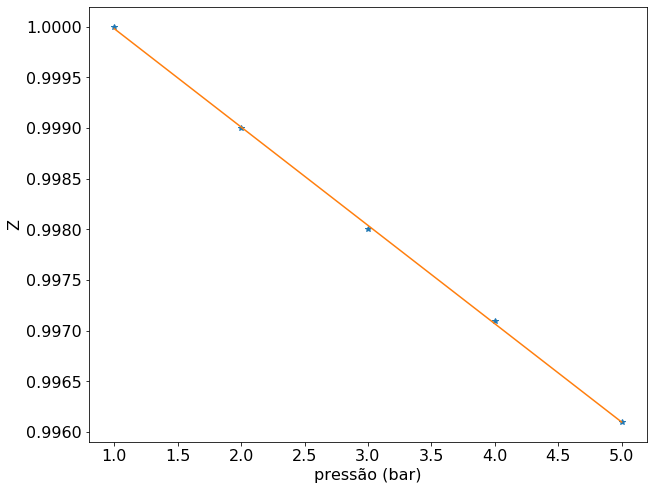

In [3]:
#vamos construir o gráfico só para ilustrar a forma dele.

#plotando o gráfico para fins didáticos
plt.rcParams.update({'font.size': 16}) # estes dois parâmetros precisam aparecer antes da definição do plot
plt.figure(figsize=(10,8))

plt.plot(p,Z,'*')
plt.plot(p,y(p))
plt.xlabel('pressão (bar)')
plt.ylabel('Z')
plt.show

<font size ="4"> Como esperado, no intervalo de pressões avaliado, o fator de compressibilidade segue um equação de primeiro grau em relação a pressão. Isso justifica o uso de uma regressão linear para o cálculo do segundo coeficiente do virial. <font>

## Exemplo 2: Cálculo da temperatura de Boyle


<font size ="4"> A teperatura de Boyle é defina como a temperatura na qual o gás se comporta idealmente por um maior intervalo de pressões. Na temperatura de Boyle, o gráfico de Z contra p de um gás é tangente a linha do gás ideal em p = 0, e só aumentará gradualmente acima de Z = 1. Derive uma expressão para a  temperatura de Boyle usando
    
    
$$ Z = 1 + \frac{B'}{RT}p + \frac{C'}{RT}p^2 + ... $$
    
    
    
e determine o valor para o $O_2(g)$ usando os dados abaixo.
    

|   |   |   |   |   |   | 
|---|---|---|---|---|---|
|T(K)   |  350 | 400  | 450  | 500  | 550  |
|$\frac{B_v}{RT} (cm^3/mol)$| -7.27  | -1.85  | 1.87  | 4.65  | 7.23  | <font>

<font size = "4">
    
    
### Solução

Truncando a séria acima no segundo termo e derivando em função de p:
$$ \frac{\partial Z}{\partial p} = \frac{B'}{RT} = \frac{B/RT}{RT} $$
Onde foi usado $B' = \frac{B}{RT}$.

Foi informado que $ \frac{\partial Z}{\partial p} = 0 $, logo, na temperatura de Boyle o segundo coeficiente do viral é 0. Podemos ajustar uma função a estes dados e encontrar as raízes da função ajustada. Neste exercício ajustaremos uma função do segundo grau. 
    
O cálculo das raízes fará uso da rotina numpy.roots(coef). Onde coef são os coeficientes do polínônio ordenados do termo de maior ordem para o de menor ordem. <font>

In [4]:
# Inicializando as variáveis
R = 0.08314   # bar L / K mol


T = np.array([350., 400.0, 450., 500., 550.])   # K
Bv = np.array([-7.27, -1.85, 1.87, 4.65, 7.23]) # Segundo coeficiente na expansão do volume

Bp = Bv/(R*T*1000) # Segundo coeficiente na expansão da pressão

#Regressão 
deg = 2
z = np.polyfit(T, Bp, deg)
y = np.poly1d(z)

#Calcula e imprime as raízes da função.
print('Raízes da função = ', np.roots(z))



Raízes da função =  [676.10774971 426.56601066]


<font size ="4"> Como é esperado, a função apresenta duas raízes reais. No entanto, só existe um valor para temperatura de Boyle. Para decidirmos qual raíz é o valor correto da temperatura de Boyle, é preciso inspecionar o gráfico de B versus p. Esta inspeção além de ajudar a decidir qual o valor correto da temperatura de Boyle, mostrará porque foi ajustado uma equação de segundo grau aos dados do problema e não uma equação de primeiro grau. <font>

<function matplotlib.pyplot.show(*args, **kw)>

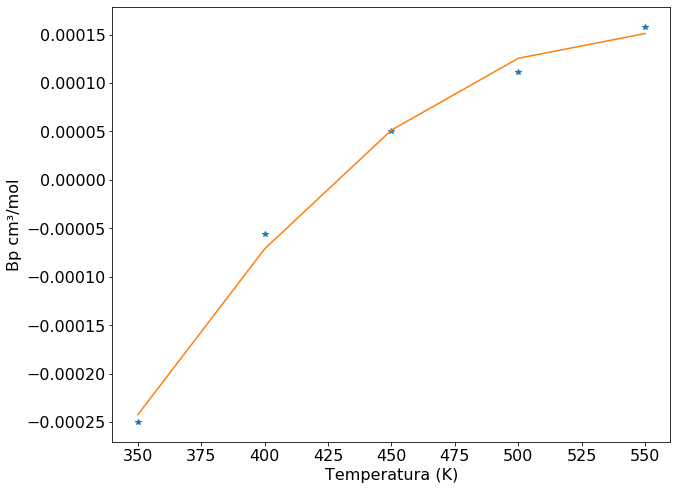

In [5]:
#vamos construir o gráfico para analisar qual das raízes fornece a temperatura de Boyle.

#plotando o gráfico para fins didáticos
plt.rcParams.update({'font.size': 16}) # estes dois parâmetros precisam aparecer antes da definição do plot
plt.figure(figsize=(10,8))

plt.plot(T,Bp,'*')
plt.plot(T,y(T))
plt.xlabel('Temperatura (K)')
plt.ylabel('Bp cm³/mol')
plt.show

<font size = "4"> A análise do gráfico mostra que a segunda raíz corresponde a temperatura de Boyle: 426.6 K. Foi escolhida esta raíz porque os dados experimentais interceptam o valor zero de $B'$ em aproximadamente 425 K. Também é possível observar que os dados do problema se ajustam melhor a uma equação de segundo grau do que a uma reta. <font>


## Exemplo 3: Cálculo da temperatura de Boyle a partir de uma equação empírica para $B'(T)$




<font size = "4">O segundo coeficiente do virial do metano pode ser obtido, de forma aproximada através da equação empírica $B(T) = a + be^{-c/T²}$, em que a=-0,1993 $bar^{-1}$, b=0,2002 $bar^{-1}$, c = 1131$K^2$, com 300K< T < 600 K. Qual o valor de temperatura do Boyle para o metano? <font>

<font size ="4">


### Solução

Sabe-se que o valor do coeficiente virial é dependente da temperatura. Na temperatura de Boyle, o segundo coeficiente viral é nulo, B=0. Logo, temos o seguinte resultado:

$0 = a + be^{-c/T^2}$

$T_B = \sqrt{\frac{-c}{ln(-a/b)}}$ <font>

In [6]:
#Definindo variáveis

a=-0.1993     #bar^-1
b= 0.2002     #bar^-1
c= 1131       #K^2

#Calculado Tb
T = np.sqrt(-c/(np.log(-a/b)))

print('Temperatura (K) = ' + format(T,'6.4f'))

Temperatura (K) = 501.0177


## Exemplo 4: Cálculo do volume de uma gás que obedece a equação de van der Waals 

<font size = "4">
Estime o volume molar do $CO_2$, a 500 K e 100 atm, admitindo que o gás se comporta como um gás de van der Waals. <font>

<font size = "4">


### Solução

É necessário encontrar uma expressão para o volume molar resolvendo a equação de van der Waals. A equação pode ser escrita da seguinte forma:

$(p + \frac{a}{V_m^2})(V_m-b)=RT$

À partir da primeira equação a seguinte equação polinomial pode ser obtida:

$ pV_m - pb + \frac{a}{V_m} -\frac{ab}{V_m^2} = RT$

$pV_m^3 - pbV_m^2 + aV_m -ab = RTV_m^2$

$ pV_m^3 - (pb+RT)V_m^2 + aV_m -ab = 0 $

As raízes da última equação devem ser calculadas para obtermos o volume do $CO_2$. <font>


    

In [7]:
#Definindo as variáveis segundo dados da literatura.

a = 3.610       # dm^6 atm mol^-1
b = 4.29e-2     # dm^3 mol^-1
R = 0.082057    #L · atm · K−1 · mol−1  
T = 500         # K
p = 100         # atm

# 1) Criar um vetor com os coeficientes do polinômio
# os valores dos coeficientes foram calculados dentro do vetor 
# coeficientes ordenados a partir do coeficiente de maior ordem para o de menor ordem

coef = np.array([p, -(p*b+R*T), a, -a*b])

# 2) Calcular as raízes, no caso de mais de uma raíz real, o valor correto será próximo a volume do gás ideal

raiz = np.roots(coef)

# Imprimindo as raízes
print('Raíz 1 = ' + format(raiz[0] , ' 6.5e')) 
print('Raíz 2 = ' + format(raiz[1] , ' 6.5e')) 
print('Raíz 3 = ' + format(raiz[2] , ' 6.5e')) 


Raíz 1 =  3.66141e-01+0.00000e+00j
Raíz 2 =  4.35218e-02+4.83282e-02j
Raíz 3 =  4.35218e-02-4.83282e-02j


 <font size = "4">O volume molar é 0,366 L, pois só existe uma raíz real. <font>

## Exemplo 5: Cálculo dos coeficientes do virial para o argônio

<font size ="4">Uma substância elementar e bem conhecida como o argônio ainda é objeto de bastante pesquisa. Stewart e Jacobsen publicaram uma revisão das propriedades termodinâmicas do argônio, entre as quais a seguinte isoterma a 300K.  
    
     
|   |   |   |   |   |   |   |   |   |   |   | 
|---|---|---|---|---|---|---|---|---|---|---|
|p (MPa)   |  0.4000| 0.5000| 0.6000| 0.8000| 1.000| 1.500| 2.000| 2.500| 3.000| 4.000|
|$V_m$ (dm³/mol)| 6.2208|4.9736|4.1423|3.1031|2.4795|1.6483|1.2328|0.98357|0.81746|0.60998|  
    
     
   
a) Calcule o segundo coeficiente virial B, na temperatura informada. B)Estime o terceiro coeficiente virial,C, na temperatura mencionada. <font>

<font size = "4">

### Solução

Podemos escrever a equação de estado da seguinte forma:

$$ \frac{pV_m}{RT} = 1 + \frac{B}{V_m} + \frac{C}{V_m^2} + ...$$

Em primeira aproximação pode ser feito uma gráfico de $ \frac{pV_m}{RT}$ versus $ \frac{1}{V_m} $ e depois ser ajustada uma função de primeiro grau aos dados. O  coeficiente angular será o segundo coeficiente do virial. O terceiro coeficiente do virial pode ser obtido pelo ajuste de uma função do segundo grau. <font>

In [8]:
# Definindo variáveis

T = 300         #K
R = 8.314e-3    #dm3 · MPa · K−1 · mol−1   


p = np.array ([0.4000,0.5000, 0.6000, 0.8000, 1.000, 1.500, 2.000, 2.500, 3.000, 4.000])        # MPa
vm =np.array([6.2208,4.9736,4.1423,3.1031,2.4795,1.6483,1.2328,0.98357,0.81746,0.60998])        # dm^-3

Coef = p*vm / (R * T)

# Cálculo de 1/Vm para plotar o  gráfico de interseção 

InversoVm = 1 / vm

deg = 1
z = np.polyfit(InversoVm, Coef, deg)
y = np.poly1d(z)

# O segundo coeficiente do virial está relacionado ao coeficiente linear da regressão

print('coeficiente angular =', format(z[0] , 'f'))  
print('coeficiente linear =', format(z[1] , 'f')) 

print ('B (L/mol)= ' + format(z[0], 'f'))


coeficiente angular = -0.013239
coeficiente linear = 0.999541
B (L/mol)= -0.013239


<font size ="4"> De acordo com os valores acima, a equação da reta é y = -0.013239x + 0,999541.
A interseção em y é próximo ao valor de 1. De acordo com o valor da reta, temos **B = -0.013239** L/mol. <font>

In [9]:
#Encontrando o Terceiro Coeficiente da Equação do Virial - C

deg = 2
z1 = np.polyfit(InversoVm, Coef, deg)
y1 = np.poly1d(z1)


print('Valor de C (L^6 mol^{-2})=', format(z1[0] , 'f'))  
print('Valor de B (L/mol) =', format(z1[1] , 'f')) 

Valor de C (L^6 mol^{-2})= 0.001063
Valor de B (L/mol) = -0.015026


<font size = "4">Observe que o segundo coeficiente do virial é modificado de acordo com a função ajustada.
Vamos comparar os ajustes olhando para o gráfico que contem os dois ajustes. Observe que as duas equações obtidas se ajustam de forma adequada aos dados do problema, mas a equação de primeiro grau apresenta um maior erro no ajuste<font>

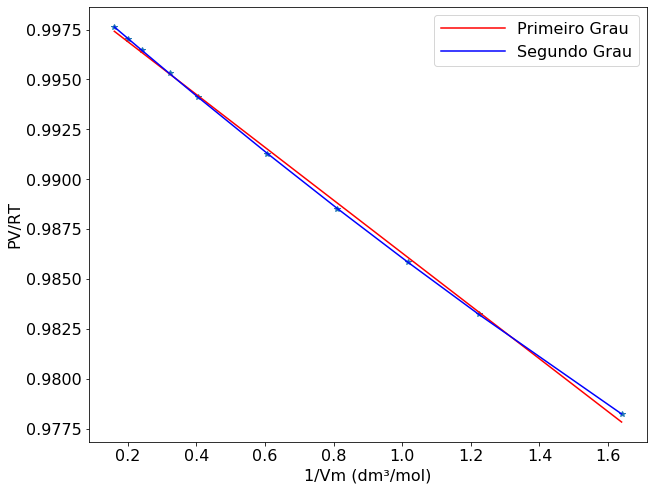

In [10]:
#plotando o gráfico para fins didáticos
plt.rcParams.update({'font.size': 16}) # estes dois parâmetros precisam aparecer antes da definição do plot
plt.figure(figsize=(10,8))

plt.plot(InversoVm, Coef, "*")
plt.plot(InversoVm, y(InversoVm), color='red', label='Primeiro Grau')
plt.plot(InversoVm, y1(InversoVm), color='blue', label='Segundo Grau')
plt.ylabel('PV/RT')
plt.xlabel('1/Vm (dm³/mol)')
plt.legend(handlelength=4,loc='best')
plt.show()

## Exemplo 6

Determine $ \phi$ e f para $O_2(g)$ a 1000 bar e 0ºC a partir dos seguintes dados:

|   |   |   |   |   |   |   |   |   |   |   |   |
|---|---|---|---|---|---|---|---|---|---|---|---|
|p(bar)   |  1 | 100  | 200  | 300  | 400  | 500  | 600  | 700  | 800  | 900  | 1000  |
|$V_m$ (L/mol)   | 22.710  | 0.2098  | 0.1045  | 0.0715  | 0.0601  | 0.0527  | 0.0471  | 0.0443  | 0.0420  | 0.0403  | 0.0.384  |

### Solução

Para gases reais: $ ln\phi = \int_{0}^{p} \frac{Z-1}{p} dp$

$Z = \frac{V_m}{V_{m,id}} = \frac{pV_m}{RT}$

Substituindo a definição e Z na primeira equação:

$ ln\phi = \int_{0}^{p} (\frac{V_m}{RT} -\frac{1}{p})dp$

A área sob o gráfico de $(\frac{V_m}{RT} -\frac{1}{p})$ versus p é exatamente a $ln \phi$.

O jeito mais simples de resolver este problema é usando um método de integração numérica como a regra do trapézio ou regra e Simpson. Nestes casos não é necessário o ajuste de um polinômio aos dados do problema para posterior integração da função obtida.

In [11]:
p = np.array([1.,100., 200., 300., 400., 500., 600., 700., 800., 900., 1000.])
V = np.array([22.710, 0.2098, 0.1045, 0.0715, 0.0601, 0.0527, 0.0471, 0.0443, 0.0420, 0.0403, 0.0384])

R = 0.08314   # L bar / K mol
T = 273.15    # K
pi = 1000.0    # bar

ordenada = V/(R*T) - 1/p

# Foram informadas as instruções para os dois métodos de integração
# para que o usuário escolha o método mais conveniente, além de tomar conhecimento
# das instruções de cada método.

#ln_phi = simps(ordenada, p)  # integração usando a regra de Simpson

ln_phi = trapz(ordenada, p)  # integração usando a regra de trapézio

phi = np.exp(ln_phi) 
f = pi * phi


print('Coeficiente de fugacidade = ' + format(phi , '6.3f'))
print('Fugacidade (bar) = ' + format(f, '6.3e'))

Coeficiente de fugacidade =  1.182
Fugacidade (bar) = 1.182e+03


<function matplotlib.pyplot.show(*args, **kw)>

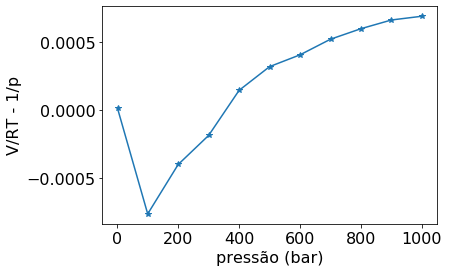

In [12]:
#vamos construir o gráfico só para ilustrar a forma dele.

plt.plot(p,ordenada,'-*')
plt.xlabel('pressão (bar)')
plt.ylabel('V/RT - 1/p')
plt.show